# Volume 3 Project

This is where we will work on our volume 3 project. Remember to pull before working and to push after making any edits!

In [35]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import sklearn
from scipy import stats
from statsmodels.regression.linear_model import OLS
from sklearn import linear_model as lm
from sklearn import naive_bayes
from sklearn.model_selection import train_test_split

# Data Cleaning
Data on college atrributes comes from https://opportunityinsights.org/data/
Pell grant data comes from  https://www2.ed.gov/finaid/prof/resources/data/pell-institution.html

Research question and overview of the data (10 points): The quality of the research question(s) you are asking plays a big role in how good the entire project is. Make a clear case for why your question is interesting, well thought out, precisely formulated, and answerable, at least in principle, with adequate data and the techniques of machine learning.

Briefly review what is already known about your research questions and what techniques others have used to study these questions. The best written reports include references to prior work.
Explain the data set, before analysis. In special cases, if necessary and appropriate, you may generate your own data through a well-designed experiment.  Form a thoughtful hypothesis or hypotheses about the data. Answer the following questions and any others that may be relevant to your question and your data set:
Where did the data come from?
Why is the data set legitimate (especially if you generated it)? What weaknesses or problems does the data set have?
Why is this a good choice of data set to answer your research questions (as opposed to other similar data sets)?
What do you expect your analysis to reveal?
What other interesting questions will analyzing this data answer?

Data Cleaning / Feature Engineering (15 points): Take the data from its original form to something that you can work with well.

Strongly consider using regular expressions and Pandas to organize and format your data.
Detect and correct (or remove) problems like missing, badly formatted, or incorrect data.
Justify your choices of what you removed, edited, reformatted, or left unchanged.
Apply various data handling techniques to engineer additional features that may be useful for answering your research questions. For example, in the titanic data set, you could use titles (miss, mrs., master, mr.) to identify marital status. As another example, in a data set that reports wind direction in degrees, 359 is actually very close to 0, so you might want to add periodic functions of wind angle like sine and cosine to better reflect this.

Robustness (10 points): Data cleaning code should be very easy to modify so that it is usable for similar data sets, or so it can handle the same data set but with more data points. Be as general as possible so that as much of your work on this project as possible can be applied to another problem in the future (for example, if you get more data added to your original data set).

In [51]:
# Load in Opportunity Insight data
mobility_df = pd.read_csv("mrc_table1.csv")
characteristics_df = pd.read_csv("mrc_table10.csv")

# Merge dataframes
mobility_df = mobility_df.drop(columns=['name', 'state', 'czname']) 
df = mobility_df.merge(characteristics_df, on='super_opeid', how="outer")

In [26]:
df["county"].value_counts()

Los Angeles    58
Cook           42
Montgomery     32
Jefferson      32
Orange         31
               ..
Leflore         1
Cooke           1
Marathon        1
Covington       1
Highlands       1
Name: county, Length: 829, dtype: int64

In [52]:
# This section is for filling in the missing values.

# df[""] = df[""].fillna(df[""].mean())
# Data coming from the Mobility table
# There are ~264 nans in here out of ~2466. Probably is okay if we set the nans to the means. 
df["par_median"] = df["par_median"].fillna(df["par_median"].mean())
df["k_median"] = df["k_median"].fillna(df["k_median"].mean())
df["par_q1"] = df["par_q1"].fillna(df["par_q1"].mean())
df["par_top1pc"] = df["par_top1pc"].fillna(df["par_top1pc"].mean())
df["kq5_cond_parq1"] = df["kq5_cond_parq1"].fillna(df["kq5_cond_parq1"].mean())
df["ktop1pc_cond_parq1"] = df["ktop1pc_cond_parq1"].fillna(df["ktop1pc_cond_parq1"].mean())
df["mr_kq5_pq1"] = df["mr_kq5_pq1"].fillna(df["mr_kq5_pq1"].mean())
df["mr_ktop1_pq1"] = df["mr_ktop1_pq1"].fillna(df["mr_ktop1_pq1"].mean())
df["trend_parq1"] = df["trend_parq1"].fillna(df["trend_parq1"].mean())
df["trend_bottom40"] = df["trend_bottom40"].fillna(df["trend_bottom40"].mean())
df["count"] = df["count"].fillna(df["count"].mean())

# Data from College Characteristics table
#df["name"] = df["name"].fillna(df["name"].mean())
#df["region"] = df["region"].fillna(df["region"].mean())
#df["state"] = df["state"].fillna(df["state"].mean())
#df["fips"] = df["fips"].fillna(df["fips"].mean())
#df["cz"] = df["cz"].fillna(df["cz"].mean())
#df["czname"] = df["czname"].fillna(df["czname"].mean())
#df["cfips"] = df["cfips"].fillna(df["cfips"].mean())
df["county"] = df["county"].fillna("none")
#df["zip"] = df["zip"].fillna(df["zip"].mean())
#df["tier"] = df["tier"].fillna(df["tier"].mean())
#df["tier_name"] = df["tier_name"].fillna(df["tier_name"].mean())
#df["type"] = df["type"].fillna(df["type"].mean())
#df["iclevel"] = df["iclevel"].fillna(df["iclevel"].mean())
#df["public"] = df["public"].fillna(df["public"].mean())
#df["barrons"] = df["barrons"].fillna(df["barrons"].mean())

# If a school has nan here, they probably actually spent money on instruction
df["exp_instr_pc_2000"] = df["exp_instr_pc_2000"].fillna(df["exp_instr_pc_2000"].mean())
df["exp_instr_pc_2013"] = df["exp_instr_pc_2013"].fillna(df["exp_instr_pc_2013"].mean())
#df["multi"] = df["multi"].fillna(df["multi"].mean())
#df["hbcu"] = df["hbcu"].fillna(df["hbcu"].mean())
#df["flagship"] = df["flagship"].fillna(df["flagship"].mean())

# I'm not sure what this is.
df["ipeds_enrollment_2013"] = df["ipeds_enrollment_2013"].fillna(df["ipeds_enrollment_2013"].mean())
df["ipeds_enrollment_2000"] = df["ipeds_enrollment_2000"].fillna(df["ipeds_enrollment_2000"].mean())

# The school probably does cost something instead of nan. Let's do the mean
df["sticker_price_2013"] = df["sticker_price_2013"].fillna(df["sticker_price_2013"].mean())
df["sticker_price_2000"] = df["sticker_price_2000"].fillna(df["sticker_price_2000"].mean())

# Not quite sure about this column. Going to set to mean since the mean seams to be around 50%
df["grad_rate_150_p_2013"] = df["grad_rate_150_p_2013"].fillna(df["grad_rate_150_p_2013"].mean())
df["grad_rate_150_p_2002"] = df["grad_rate_150_p_2002"].fillna(df["grad_rate_150_p_2002"].mean())

# Giving teachers the average salary of other teachers makes sense here. 
df["avgfacsal_2013"] = df["avgfacsal_2013"].fillna(df["avgfacsal_2013"].mean())
df["avgfacsal_2001"] = df["avgfacsal_2001"].fillna(df["avgfacsal_2001"].mean())

# I will include this column. Too much of the data is missing for me to feel comfortable setting it to the mean. If you want to use it, get rid of the zero values.
df["sat_avg_2013"] = df["sat_avg_2013"].fillna(0)
df["sat_avg_2001"] = df["sat_avg_2001"].fillna(0)

# Probably okay to set to mean. Also not much missing data
df["scorecard_netprice_2013"] = df["scorecard_netprice_2013"].fillna(df["scorecard_netprice_2013"].mean())

# Too much of the data is missing. I am dropping this column.
df = df.drop(columns=["scorecard_rej_rate_2013"])
#df["scorecard_rej_rate_2013"] = df["scorecard_rej_rate_2013"].fillna(df["scorecard_rej_rate_2013"].mean())

# Setting to the mean seems alright for this.
df["scorecard_median_earnings_2011"] = df["scorecard_median_earnings_2011"].fillna(df["scorecard_median_earnings_2011"].mean())

# I'm not quite sure what this entails and quite a bit of data is missing. I'm dropping it.
df = df.drop(columns=["endowment_pc_2000"])
#df["endowment_pc_2000"] = df["endowment_pc_2000"].fillna(df["endowment_pc_2000"].mean())

# I feel comfortable setting nans to the mean here.
df["exp_instr_2012"] = df["exp_instr_2012"].fillna(df["exp_instr_2012"].mean())
df["exp_instr_2000"] = df["exp_instr_2000"].fillna(df["exp_instr_2000"].mean())

# For the rest of these, there isn't a ton of data missing, so I'll drop the rows.
df["asian_or_pacific_share_fall_2000"] = df["asian_or_pacific_share_fall_2000"].fillna(df["asian_or_pacific_share_fall_2000"].mean())
df["black_share_fall_2000"] = df["black_share_fall_2000"].fillna(df["black_share_fall_2000"].mean())
df["hisp_share_fall_2000"] = df["hisp_share_fall_2000"].fillna(df["hisp_share_fall_2000"].mean())
df["alien_share_fall_2000"] = df["alien_share_fall_2000"].fillna(df["alien_share_fall_2000"].mean())
df["pct_arthuman_2000"] = df["pct_arthuman_2000"].fillna(df["pct_arthuman_2000"].mean())
df["pct_business_2000"] = df["pct_business_2000"].fillna(df["pct_business_2000"].mean())
df["pct_health_2000"] = df["pct_health_2000"].fillna(df["pct_health_2000"].mean())
df["pct_multidisci_2000"] = df["pct_multidisci_2000"].fillna(df["pct_multidisci_2000"].mean())
df["pct_publicsocial_2000"] = df["pct_publicsocial_2000"].fillna(df["pct_publicsocial_2000"].mean())
df["pct_stem_2000"] = df["pct_stem_2000"].fillna(df["pct_stem_2000"].mean())
df["pct_socialscience_2000"] = df["pct_socialscience_2000"].fillna(df["pct_socialscience_2000"].mean())
df["pct_tradepersonal_2000"] = df["pct_tradepersonal_2000"].fillna(df["pct_tradepersonal_2000"].mean())

# Drop the nan rows
df = df.dropna()

In [34]:
the_column = "scorecard_rej_rate_2013"
print(df[the_column].min())
print(df[the_column].mean())
print(df[the_column].max())

0.0
0.3571634023429455
0.94309998


In [18]:
for i in df:
    print(i, ":\t", df[i].isna().sum())

super_opeid :	 0
par_median :	 0
k_median :	 264
par_q1 :	 264
par_top1pc :	 264
kq5_cond_parq1 :	 264
ktop1pc_cond_parq1 :	 264
mr_kq5_pq1 :	 264
mr_ktop1_pq1 :	 264
trend_parq1 :	 267
trend_bottom40 :	 267
count :	 264
name :	 3
region :	 3
state :	 3
fips :	 3
cz :	 3
czname :	 3
cfips :	 3
county :	 17
zip :	 3
tier :	 3
tier_name :	 3
type :	 3
iclevel :	 3
public :	 3
barrons :	 3
exp_instr_pc_2000 :	 85
exp_instr_pc_2013 :	 11
multi :	 3
hbcu :	 3
flagship :	 3
ipeds_enrollment_2013 :	 3
ipeds_enrollment_2000 :	 51
sticker_price_2013 :	 196
sticker_price_2000 :	 306
grad_rate_150_p_2013 :	 249
grad_rate_150_p_2002 :	 337
avgfacsal_2013 :	 126
avgfacsal_2001 :	 296
sat_avg_2013 :	 1469
sat_avg_2001 :	 1620
scorecard_netprice_2013 :	 15
scorecard_rej_rate_2013 :	 1169
scorecard_median_earnings_2011 :	 77
endowment_pc_2000 :	 1722
exp_instr_2012 :	 81
exp_instr_2000 :	 137
asian_or_pacific_share_fall_2000 :	 53
black_share_fall_2000 :	 53
hisp_share_fall_2000 :	 53
alien_share_fall

In [53]:
# Create crosswalk between one-to-many super_opeid and opeid
opeid_crosswalk = pd.read_csv("mrc_table11.csv")
opeid_crosswalk = opeid_crosswalk.loc[(opeid_crosswalk['multi'] == 1) & (opeid_crosswalk['super_opeid'] != -1)]
super_opeid_lookup = dict()
for id, superid in zip(opeid_crosswalk['opeid'], opeid_crosswalk['super_opeid']):
        super_opeid_lookup.update({str(id) + '00':str(superid) + '00'})

# Format super_opeid
df['super_opeid'] = df['super_opeid'].astype('str') + '00'

# Create crosswalk between pellid and opeid
crosswalk_data = pd.read_excel("pell-inst-03-04.xls")

pell_crosswalk = crosswalk_data[['OPEID', 'PELLID']]
pell_crosswalk = pell_crosswalk.dropna()
pell_crosswalk['OPEID'] = pell_crosswalk['OPEID'].astype(int)

In [54]:
# Helper function to merge in pell grant data
def add_pell_grants(df, year, ftype, vars, id, add_opeid=False, add_zeros=False):
    # Load in data
    pell_df = pd.read_excel("pell-inst-"+ year + ftype)
    if add_opeid:
        pell_df = pell_df.merge(pell_crosswalk, on='PELLID', how='left')
    
    # Keep relevant variables
    pell_df = pell_df[[id, vars[0], vars[1]]]
    pell_df = pell_df.dropna()
    
    # Change opeid to super_opeid
    for i in range(pell_df.shape[0]):
        opeid = str(pell_df[id].iloc[i])
        if add_zeros:
            opeid = opeid + "00"
            pell_df[id].iloc[i] = opeid
        if opeid in super_opeid_lookup.keys():
            pell_df[id].iloc[i] = super_opeid_lookup[opeid]
    
    # Sum across super_opeid
    recip_series = pell_df.groupby(id)[vars[0]].sum()
    award_series = pell_df.groupby(id)[vars[1]].sum()


    # Create new dataframe
    pell_df = pd.merge(recip_series, award_series, on=id)
    pell_df = pell_df.rename(columns = { vars[0]:'recipients_'+year[-2:], vars[1]:'awards_'+year[-2:]})
    pell_df['super_opeid'] = pell_df.index.astype('str')
    pell_df['super_opeid'] = pell_df['super_opeid'].replace(r'\.0$','',regex=True)
    
    # Merge with df
    df = df.merge(pell_df, on='super_opeid', how='left')
    return df


df = add_pell_grants(df, '99-00', '.xls', ['Recipients', 'Awards'], 'OPEID', add_opeid=True)
df = add_pell_grants(df, '00-01', '.xls', ['Recipients', 'Awards'], 'OPEID', add_opeid=True)
df = add_pell_grants(df, '01-02', '.xls', ['Recipients', 'Awards'], 'OPEID', add_opeid=True)
df = add_pell_grants(df, '02-03', '.xls', ['Recipients', 'Awards'], 'OPEID')
df = add_pell_grants(df, '03-04', '.xls', ['Recipients', 'Awards'], 'OPEID')
df = add_pell_grants(df, '04-05', '.xls', ['Recipients', 'Awards'], 'OPEID')
df = add_pell_grants(df, '05-06', '.xls', ['Recipients', 'Awards'], 'OPEID')
df = add_pell_grants(df, '06-07', '.xls', ['Recipients', 'Awards'], 'OPEID')
df = add_pell_grants(df, '07-08', '.xls', ['Recips', 'Awards'], 'OPEID')
df = add_pell_grants(df, '08-09', '.xls', ['Recipients', 'Awards'], 'OPEID')
df = add_pell_grants(df, '09-10', '.xls', ['Recips', 'Awards'], 'OPEID', add_opeid=False, add_zeros=True)
df = add_pell_grants(df, '10-11', '.xls', ['Recipients', 'Awards'], 'OPEID')
df = add_pell_grants(df, '11-12', '.xls', ['Recips', 'Awards'], 'OPEID')
df = add_pell_grants(df, '12-13', '.xls', ['Total Recipients', 'Total Awards'], 'OPE ID')
df = add_pell_grants(df, '13-14', '.xls', [' Total Recipients ', ' Total Awards '], 'OPE_ID')
df = add_pell_grants(df, '14-15', '.xls', ['Total_Recipients', 'Total_Awards'], 'OPE_ID')
# Running into an error with the xlsx files...
df = add_pell_grants(df, '15-16', '.xlsx', ['Total Recipients', 'Total Awards'], 'OPE ID')
df = add_pell_grants(df, '16-17', '.xlsx', [' TOTAL RECIPIENTS ', ' TOTAL AWARDS '], 'OPE_ID')
df = add_pell_grants(df, '17-18', '.xlsx', [' TOTAL RECIPIENTS ', ' TOTAL AWARDS '], 'OPE_ID')

XLRDError: Excel xlsx file; not supported

In [56]:
# Fill in the missing pell grant with zeros. 
df = df.fillna(0)

In [5]:
df.head()

,super_opeid,par_median,k_median,par_q1,par_top1pc,kq5_cond_parq1,ktop1pc_cond_parq1,mr_kq5_pq1,mr_ktop1_pq1,trend_parq1,...,recipients_14,awards_14,recipients_15,awards_15,recipients_16,awards_16,recipients_17,awards_17,recipients_18,awards_18
0,266500,30900.0,53000.0,36.477882,0.119815,44.843544,1.766630,16.357975,0.644429,-7.998776,...,1246.0,5164952.0,1236.0,5264086.0,1143.0,4803637.0,1025.0,4352283.0,993.0,4440556.0
1,727300,42800.0,57600.0,27.632242,0.559202,46.824234,2.556827,12.938586,0.706509,-9.186549,...,6950.0,30445365.0,7623.0,33609555.0,7671.0,33728070.0,7565.0,33739177.0,NaN,NaN
2,268800,35500.0,48500.0,32.546474,0.233515,36.021557,1.408721,11.723747,0.458489,-9.801580,...,7014.0,30977262.0,7377.0,32777164.0,7359.0,33055193.0,7444.0,34072456.0,NaN,NaN
3,702200,32500.0,40700.0,36.707489,0.000000,27.882967,0.189635,10.235138,0.069610,-5.733966,...,6032.0,24507196.0,6492.0,26836607.0,6718.0,28224374.0,6890.0,29210253.0,NaN,NaN
4,114000,36600.0,43000.0,33.116928,0.155981,29.949804,0.083620,9.918455,0.027692,-13.313572,...,13753.0,59722098.0,15563.0,67299616.0,16676.0,74698763.0,16778.0,76614345.0,17709.0,84953170.0


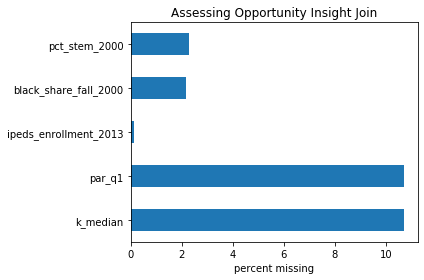

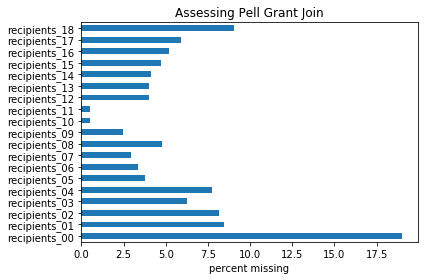

In [6]:
# Graph missing data
missing = df.isna().sum() / df.shape[0] * 100

op_insight_vars = ['k_median','par_q1','ipeds_enrollment_2013','black_share_fall_2000','pct_stem_2000']
missing[op_insight_vars].plot(kind='barh')
plt.xlabel("percent missing")
plt.title("Assessing Opportunity Insight Join")
plt.tight_layout()
plt.show()

pell_vars = ['recipients_00','recipients_01','recipients_02','recipients_03','recipients_04','recipients_05','recipients_06',
               'recipients_07','recipients_08','recipients_09','recipients_10','recipients_11','recipients_12','recipients_13',
               'recipients_14','recipients_15','recipients_16','recipients_17','recipients_18']
missing[pell_vars].plot(kind='barh')
plt.xlabel("percent missing")
plt.title("Assessing Pell Grant Join")
plt.tight_layout()
plt.show()

# Replace missing pell data with 0
pell_vars = ['recipients_00', 'awards_00', 'recipients_01', 'awards_01',
       'recipients_02', 'awards_02', 'recipients_03', 'awards_03',
       'recipients_04', 'awards_04', 'recipients_05', 'awards_05',
       'recipients_06', 'awards_06', 'recipients_07', 'awards_07',
       'recipients_08', 'awards_08', 'recipients_09', 'awards_09',
       'recipients_10', 'awards_10', 'recipients_11', 'awards_11',
       'recipients_12', 'awards_12', 'recipients_13', 'awards_13',
       'recipients_14', 'awards_14', 'recipients_15', 'awards_15',
       'recipients_16', 'awards_16', 'recipients_17', 'awards_17',
       'recipients_18', 'awards_18']
df[pell_vars] = df[pell_vars].fillna(0)

In [59]:
# Export data
df.to_csv('cleaned_dataframe.csv', index=False)